# The <code class="side-menu-class-name">RunnerScaling</code> class

_Run this notebook directly in your browser through Binder:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/runner-suite%2Frunnerase-usage-environment/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgitlab.com%252Frunner-suite%252Frunnerase-usage%26urlpath%3Dtree%252Frunnerase-usage%252Fstorage_scaling.ipynb%26branch%3Dmain)_

In [2]:
import numpy as np
from runnerase.calculators.runner import Runner
from ase.io import read
from runnerase import generate_symmetryfunctions

`RunnerScaling` is a storageclass for calculation results that are typically generated during Mode 2. It stores the minimum, maximum and mean value of each symmetry function for scaling and centering during training.

Let us run a quick modes 1 and 2 of a calculation to have some results to inspect:

In [4]:
RUNNER_CMD = 'RuNNer.serial.x > PREFIX.out'

calc = Runner(
    command=RUNNER_CMD,
    dataset=read('data/input.data', index=':', format='runnerdata'),
    label='mode1/mode1'
)

calc.symmetryfunctions += generate_symmetryfunctions(calc.dataset, sftype=2,
                                                     algorithm='turn', cutoff=12.0)

calc.run(mode=1)

calc = Runner(restart='mode1/mode1', label='mode2/mode2', command=RUNNER_CMD)
calc.set(epochs=1)
calc.run(mode=2)

Mode 1: No. Structures:   0%|          | 0/100 [00:00<?, ?it/s]

Mode 2: No. Epochs: 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


As you can see, `calc.results` now contains the `scaling` key.

In [6]:
calc.results

{'sfvalues': RunnerSymmetryFunctionValues(n_structures=100),
 'splittraintest': RunnerSplitTrainTest(n_train=93, n_test=7),
 'fitresults': RunnerFitResults(num_epochs=2, best epoch=1),
 'weights': RunnerWeights(H: 451, O: 451),
 'scaling': RunnerScaling(elements=['1', '2'], min=-25.5225552067, max=-25.5211676542)}

## Class Properties

The `RunnerScaling` class stores three interesting properties:
* `data` is a dictionary that contains one entry for each element in the dataset.
    * The element labels are the index of the element in input.data, NOT the atomic number or the element symbol.
    * For each element, it contains an array with shape (4, num_symmetry_functions_for_this_element). The four values per symmetry function are a continuous index, minimum, maximum, and mean value of the symmetry function across the whole training dataset.
* `target_min`: The minimum value of the training target (usually the energy) in the dataset.
* `target_max`: The maximum value of the training target (usually the energy) in the dataset.

In [8]:
scaling = calc.results['scaling']
scaling

RunnerScaling(elements=['1', '2'], min=-25.5225552067, max=-25.5211676542)

In [11]:
# Print the scaling array for element 1.
scaling.data['1']

array([[ 1.        , 11.57778834, 14.96097113, 13.16193015],
       [ 2.        ,  6.30193633,  8.01460922,  7.08552256],
       [ 3.        ,  9.58033594, 12.83118561, 11.21219227],
       [ 4.        ,  5.01002205,  6.60408617,  5.83292609],
       [ 5.        ,  7.19957936, 10.20472825,  8.83920566],
       [ 6.        ,  3.48152923,  4.91503779,  4.31173349],
       [ 7.        ,  4.78652206,  7.52713956,  6.3374233 ],
       [ 8.        ,  2.05792836,  3.26220696,  2.80041264],
       [ 9.        ,  2.68219307,  5.04557246,  3.97943298],
       [10.        ,  1.07087621,  1.9071489 ,  1.56734701],
       [11.        ,  1.20752615,  2.82293543,  2.04160321],
       [12.        ,  0.6024218 ,  0.94065412,  0.77189745]])

The scaling values can be plotted using the `plot` interface:

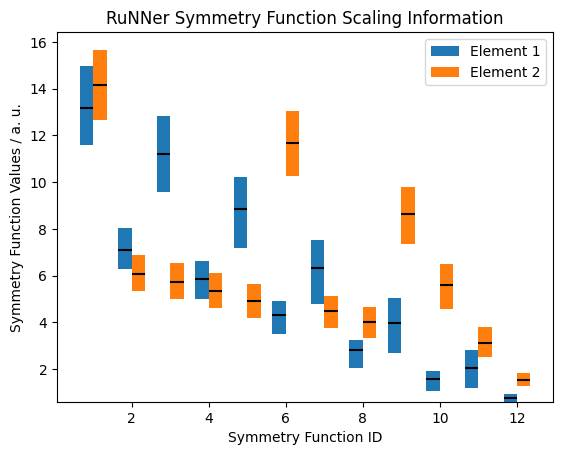

In [14]:
axes = scaling.plot.barplot()